[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joannyt/Entrega-1-IA/blob/main/04_Modelos_no_supervisados.ipynb)

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joannytorrescardona","key":"e122d5685a578d8b548822993f022abe"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d skywescar/lifesnaps-fitbit-dataset

100% 539M/540M [00:06<00:00, 99.3MB/s]
100% 540M/540M [00:06<00:00, 93.9MB/s]


In [ ]:
!unzip '/content/lifesnaps-fitbit-dataset.zip'

Archive:  /content/lifesnaps-fitbit-dataset.zip
  inflating: rais_anonymized/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv  
  inflating: rais_anonymized/csv_rais_anonymized/hourly_fitbit_sema_df_unprocessed.csv  
  inflating: rais_anonymized/mongo_rais_anonymized/fitbit.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/fitbit.metadata.json  
  inflating: rais_anonymized/mongo_rais_anonymized/sema.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/sema.metadata.json  
  inflating: rais_anonymized/mongo_rais_anonymized/surveys.bson  
  inflating: rais_anonymized/mongo_rais_anonymized/surveys.metadata.json  
  inflating: rais_anonymized/scored_surveys/breq.csv  
  inflating: rais_anonymized/scored_surveys/panas.csv  
  inflating: rais_anonymized/scored_surveys/personality.csv  
  inflating: rais_anonymized/scored_surveys/stai.csv  
  inflating: rais_anonymized/scored_surveys/ttm.csv  


In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
# importación de librerias útiles
import pandas as pd #importación de pandas para mostrar los datos en un dataframe
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from local.lib import calhousing as ch
from progressbar import progressbar as pbar
from local.lib import mlutils
from IPython import display
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib import cm
from matplotlib import gridspec
from sklearn import metrics

#Librerías de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import learning_curve

%matplotlib inline
d= pd.read_csv (r'/content/rais_anonymized/csv_rais_anonymized/daily_fitbit_sema_df_unprocessed.csv')
newData=d.groupby('id').mean()

In [ ]:
newData = newData.drop(['scl_avg', 'spo2'], axis=1)#Se eliminan columnas que tienen más del 50% de datos faltantes

In [ ]:
newData.fillna(newData.mean(),inplace=True)  

In [ ]:

#stressClassifier=[]
#sleepClassifier=[]
#for i in range(0,71):
#  if newData['stress_score'][i]<50:
#    stressClassifier.append(0) #personas con bajo porcentaje de stress
#  else:
#    stressClassifier.append(1) 
#  if newData['sleep_points_percentage'][i]<0.30:
#    sleepClassifier.append(0) #personas en rango normal 0
#  else:
#    sleepClassifier.append(1) #persona fuera del rango 1
#newData['stressclassifier']=stressClassifier
#newData['sleepClassifier']=sleepClassifier
#newData

##Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

In [ ]:
newData

,Unnamed: 0,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
id,,,,,,,,,,,,,,,,,,,,,
621e2e8e67b776a24055b564,35.000000,34.315168,56.571484,100.410210,15.270968,76.317460,0.795767,0.732540,0.771429,-1.848630,...,0.047619,0.261905,0.119048,0.000000,0.238095,0.000000,0.000000,0.500000,0.000000,0.523810
621e2eaf67b776a2406b14ac,114.500000,34.252140,68.988272,25.992988,14.767500,74.731707,0.742683,0.777439,0.711789,-2.060836,...,0.416667,0.583333,0.083333,0.000000,0.750000,0.000000,0.000000,0.416667,0.000000,0.666667
621e2ed667b776a24085d8d1,215.500000,33.998974,72.814016,26.519625,17.680000,58.837131,0.591607,0.585031,0.589589,-1.372850,...,0.285714,0.163265,0.102041,0.020408,0.755102,0.000000,0.000000,0.163265,0.000000,0.428571
621e2ef567b776a24099f889,322.500000,31.975482,61.727647,41.241060,14.779468,58.837131,0.591607,0.585031,0.589589,-1.435831,...,0.228029,0.316435,0.068987,0.008074,0.710343,0.095529,0.016242,0.140065,0.072657,0.280589
621e2efa67b776a2409dd1c3,441.000000,34.167044,61.727647,41.241060,14.779468,58.837131,0.591607,0.585031,0.589589,-1.124220,...,0.228029,0.316435,0.068987,0.008074,0.710343,0.095529,0.016242,0.140065,0.072657,0.280589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621e36c267b776a240ba2756,6956.500000,33.345793,61.727647,41.241060,14.779468,61.818182,0.590152,0.657386,0.593939,-0.222112,...,0.000000,0.315789,0.157895,0.000000,0.631579,0.000000,0.000000,0.052632,0.052632,0.105263
621e36dd67b776a240ce9a45,7067.000000,33.437228,61.727647,41.241060,14.779468,23.333333,0.188889,0.225000,0.288889,-1.435831,...,0.000000,0.041667,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.291667,0.458333
621e36f967b776a240e5e7c9,7184.285714,33.988318,60.920045,70.315795,14.715556,68.717391,0.714493,0.681522,0.667391,-2.152995,...,0.273810,0.476190,0.071429,0.000000,0.785714,0.000000,0.095238,0.107143,0.357143,0.238095


In [ ]:
X=newData.iloc[:,6:51].values
y=newData.loc[:,'stress_score'].values  #df.loc[:, 'tip'] 
y=y/100

In [ ]:
y

array([0.7631746 , 0.74731707, 0.58837131, 0.58837131, 0.58837131,
       0.69289474, 0.47904762, 0.61409091, 0.52244444, 0.58837131,
       0.75193182, 0.58837131, 0.7628125 , 0.58837131, 0.58837131,
       0.58837131, 0.38660714, 0.58837131, 0.58837131, 0.52872727,
       0.58837131, 0.58837131, 0.145     , 0.58837131, 0.58837131,
       0.58837131, 0.58837131, 0.58837131, 0.58837131, 0.72616667,
       0.58837131, 0.79823529, 0.72      , 0.79385965, 0.69254237,
       0.58837131, 0.39117647, 0.68406593, 0.58837131, 0.12857143,
       0.58837131, 0.55907895, 0.58837131, 0.7152439 , 0.81654545,
       0.8080303 , 0.6372    , 0.58837131, 0.58837131, 0.58837131,
       0.36918919, 0.407     , 0.58837131, 0.605625  , 0.52333333,
       0.58837131, 0.387     , 0.58837131, 0.58837131, 0.48181818,
       0.58837131, 0.56849057, 0.52215686, 0.77258065, 0.58837131,
       0.58837131, 0.61818182, 0.23333333, 0.68717391, 0.58837131,
       0.72909091])

In [ ]:
Xtensor = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid())

In [ ]:
model

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(45, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
 
model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=45, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [ ]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001) #optimizador

In [ ]:
n_epochs = 100
batch_size = 10
losslist=[]
epocas=[]
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = Xtensor[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
          y_pred = model(Xtensor)
          a=loss.tolist()
          losslist.append(a)
          epocas.append(epoch+1)
        print(f'Finished epoch {epoch}, loss {loss}')

Finished epoch 0, loss 61.72454833984375
Finished epoch 0, loss 59.603065490722656
Finished epoch 0, loss 55.7813720703125
Finished epoch 0, loss 59.73564910888672
Finished epoch 0, loss 64.77955627441406
Finished epoch 0, loss 51.274513244628906
Finished epoch 0, loss 57.55402374267578
Finished epoch 0, loss 72.90909576416016
Finished epoch 1, loss 61.72454833984375
Finished epoch 1, loss 59.603065490722656
Finished epoch 1, loss 55.7813720703125
Finished epoch 1, loss 59.73564910888672
Finished epoch 1, loss 64.77955627441406
Finished epoch 1, loss 51.274513244628906
Finished epoch 1, loss 57.55402374267578
Finished epoch 1, loss 72.90909576416016
Finished epoch 2, loss 61.72454833984375
Finished epoch 2, loss 59.603065490722656
Finished epoch 2, loss 55.7813720703125
Finished epoch 2, loss 59.73564910888672
Finished epoch 2, loss 64.77955627441406
Finished epoch 2, loss 51.274513244628906
Finished epoch 2, loss 57.55402374267578
Finished epoch 2, loss 72.90909576416016
Finished epoc

(71, 2)


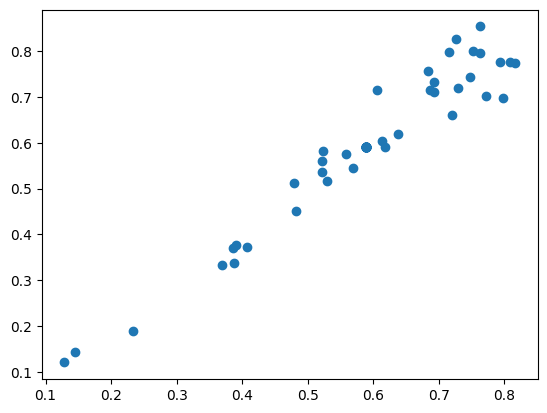

In [ ]:
wws = newData.loc[:,'sleep_points_percentage', ].values  #df.loc[:, 'tip'] 
combined_matrix = np.column_stack((y, wws))
combined_matrix.shape
X=combined_matrix
print (X.shape)
plt.scatter(X[:,0], X[:,1])

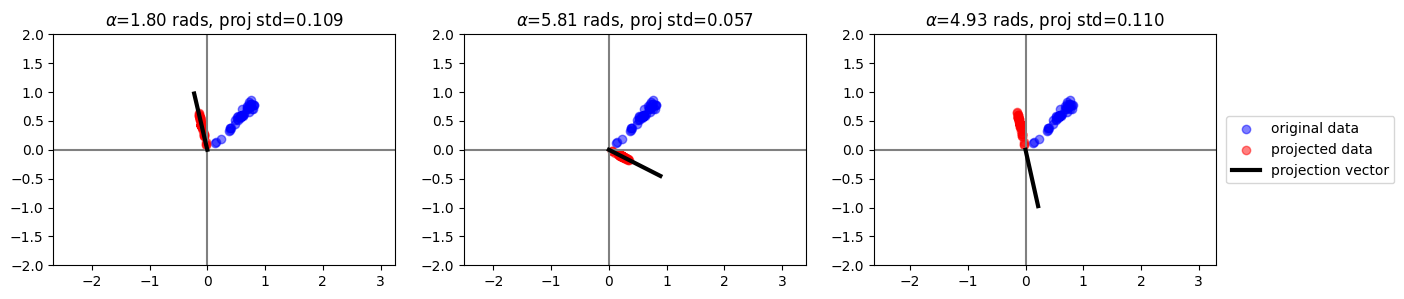

In [ ]:
plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

for i in range(3):
    plt.subplot(1,3,i+1)
    angle = np.random.random()*np.pi*2 if i!=0 else 1.8
    v = unit_vector(angle)

    c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
    Xp = np.repeat(v.reshape(-1,2),len(X),axis=0)*c

    plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
    plt.scatter(Xp[:,0], Xp[:,1], color="red", alpha=.5, label="projected data")
    plt.axvline(0, color="gray")
    plt.axhline(0, color="gray")
    plt.plot([0,v[0]], [0,v[1]], color="black", lw=3, label="projection vector")
    plt.axis('equal')
    plt.ylim(-2,2)
    plt.title("$\\alpha$=%.2f rads, proj std=%.3f"%(angle, np.std(c)))
    if i==2:
        plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

Text(0, 0.5, 'projection std')

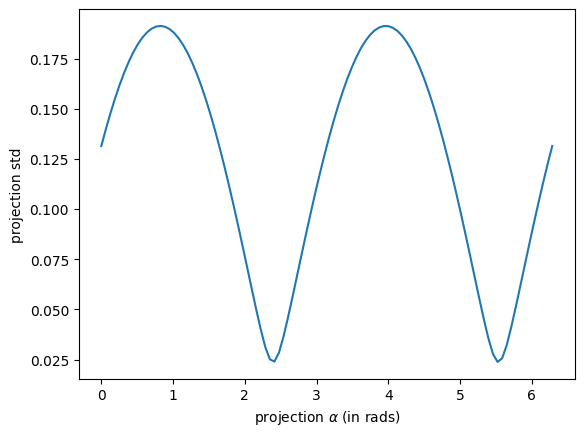

In [ ]:
def get_maxmin_projections(X):
    stds = []
    angles = np.linspace(0,np.pi*2, 100)
    for a in angles:
        v = np.array([np.cos(a), np.sin(a)])
        c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
        stds.append(np.std(c))
    v2 = unit_vector(angles[np.argmin(stds)])
    v1 = unit_vector(angles[np.argmax(stds)])
    
    return angles, stds, v1, v2
angles, stds, v1, v2 = get_maxmin_projections(X)

plt.plot(angles, stds)
plt.xlabel("projection $\\alpha$ (in rads)")
plt.ylabel("projection std")

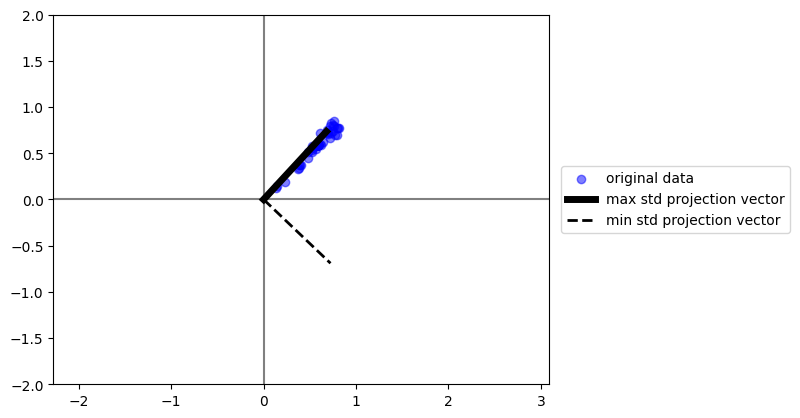

In [ ]:
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.axvline(0, color="gray")
plt.axhline(0, color="gray")
plt.plot([0,v1[0]], [0,v1[1]], color="black", lw=5, label="max std projection vector")
plt.plot([0,v2[0]], [0,v2[1]], color="black", ls="--", lw=2, label="min std projection vector")
plt.axis('equal')
plt.ylim(-2,2)
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) 
pca.fit(X)
print ("sklearn PCA components")
print (pca.components_)
print ("brute force components")
print (v1)
print (v2)

sklearn PCA components
[[-0.68114194 -0.73215139]]
brute force components
[0.67850941 0.73459171]
[ 0.72373404 -0.69007901]


In [ ]:
c = pca.transform(X)
print (c.shape)
c

(71, 1)


array([[-2.68542210e-01],
       [-2.18875268e-01],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [-1.74960626e-01],
       [ 1.32625169e-01],
       [-2.58824829e-02],
       [ 8.59435171e-02],
       [ 9.57798594e-09],
       [-2.64538016e-01],
       [ 9.57798594e-09],
       [-3.10671494e-01],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 2.99505398e-01],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 9.57153838e-02],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 6.30202794e-01],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [ 9.57798594e-09],
       [-2.66364399e-01],
       [ 9.57798594e-09],
       [-2.21230747e-01],
       [-1.40545563e-01],
       [-2.74559484e-01],
       [-1.57761165e-01],
       [ 9.57798594e-09],
       [ 2.91829913e-01],
       [-1.85842748e-01],
       [ 9.5

In [ ]:
%timeit pca.fit(X)

489 µs ± 47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit get_maxmin_projections(X)

6.83 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


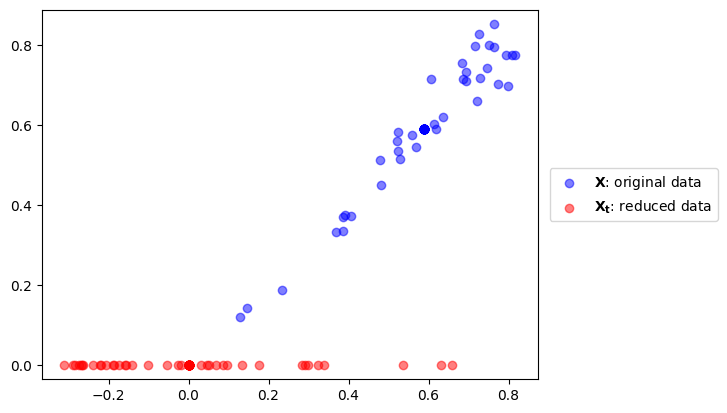

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
Xt = pca.transform(X)[:,0]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: original data")
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: reduced data")
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

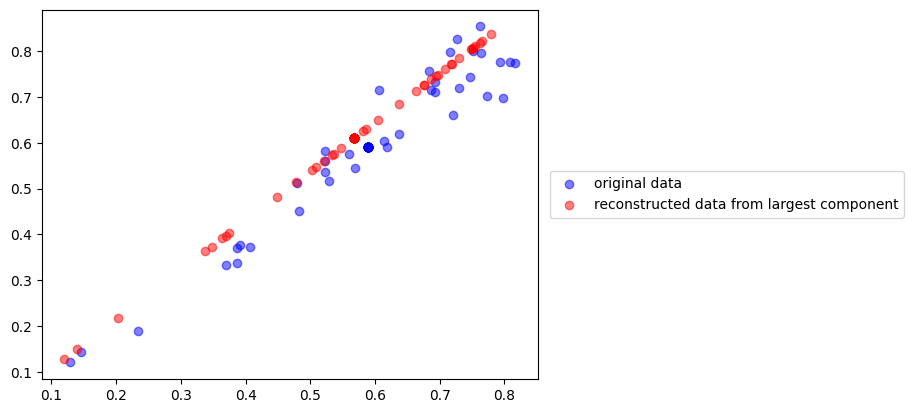

In [ ]:
v0 = pca.components_[0]
c = X.dot(v0)
Xr = np.r_[[i*v0 for i in c]]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="reconstructed data from largest component")
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))